## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4
#### Клаccификация
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Фаик Карим Яссерович
##### Группа:   НФИбд-02-21

***

### Вариант №_17_

Japanese Credit Screening Data Set  

Название файла: crx.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/  

Первый признак: A2 (столбец No 2) 

Второй признак: A8 (столбец No 8)  

Третий признак: A15 (столбец No 15) 

Класс: A16 (столбец No 16) 

Метод обработки пропущенных значений – медиана признака  

Метод нормализации признаков – масштабирование на интервал [-1, 1]  

Алгоритм снижения размерности данных – удаление признака с самой низкой дисперсией  

Метод валидации модели – повторяющиеся случайные разбиения на обучающую и тестовую выборки по 5 блокам  

Показатель качества модели – F-мера (f1)  

# 1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
data = pd.read_csv(url, names=columns, na_values='?')
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [3]:
features = data[['A2', 'A8', 'A15']]
labels = data['A16']

In [4]:
features

,A2,A8,A15
0,30.83,1.25,0
1,58.67,3.04,560
2,24.50,1.50,824
3,27.83,3.75,3
4,20.17,1.71,0
...,...,...,...
685,21.08,1.25,0
686,22.67,2.00,394
687,25.25,2.00,1
688,17.92,0.04,750


In [5]:
labels

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: A16, Length: 690, dtype: object

# 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score) . Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов. 

In [6]:
from scipy import stats

In [7]:
data = data.dropna(subset=['A16'])

In [8]:
features = features.fillna(features.median())

In [9]:
z_scores = np.abs(stats.zscore(features))
threshold = 3
filtered_entries = (z_scores < threshold).all(axis=1)
features = features[filtered_entries]
labels = labels[filtered_entries]

In [10]:
features

,A2,A8,A15
0,30.83,1.25,0
1,58.67,3.04,560
2,24.50,1.50,824
3,27.83,3.75,3
4,20.17,1.71,0
...,...,...,...
685,21.08,1.25,0
686,22.67,2.00,394
687,25.25,2.00,1
688,17.92,0.04,750


In [11]:
labels

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: A16, Length: 655, dtype: object

# 3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.33566706, -0.7826087 , -1.        ],
       [ 0.74718009, -0.47130435, -0.92586709],
       [-0.58187476, -0.73913043, -0.89091872],
       ...,
       [-0.55270323, -0.65217391, -0.99986762],
       [-0.8378063 , -0.99304348, -0.90071485],
       [-0.17347336,  0.44173913, -1.        ]])

# 4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

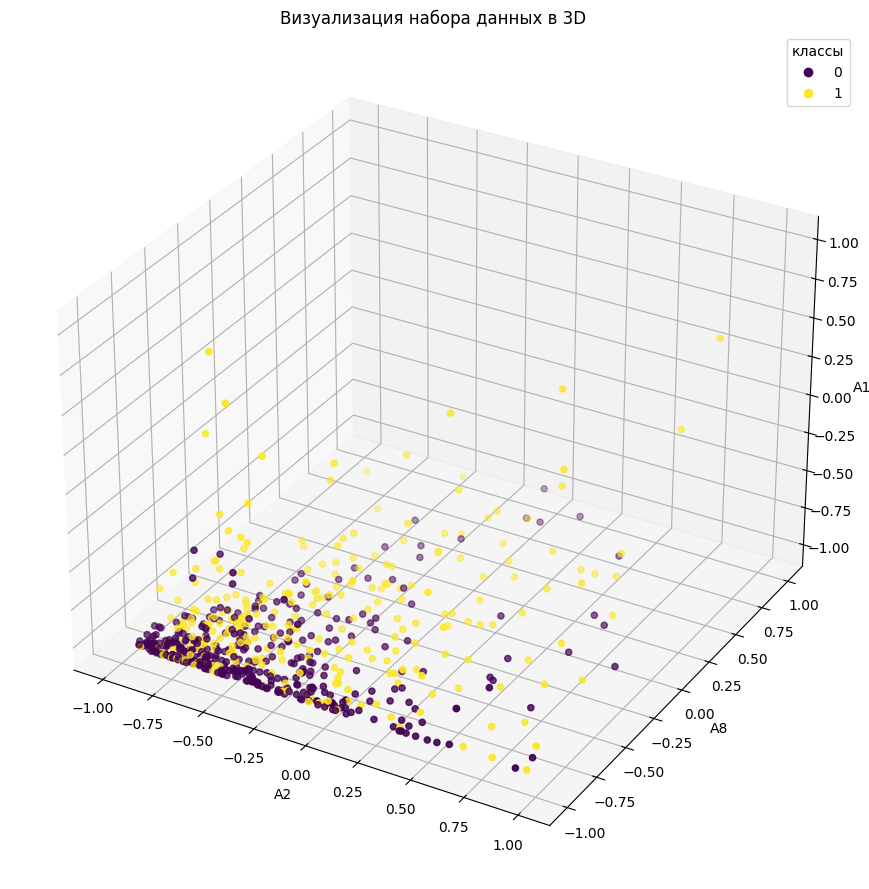

In [14]:
true_labels = np.array(labels).astype(str).astype(object)
true_labels[true_labels == '-'] = 0
true_labels[true_labels == '+'] = 1
true_labels = true_labels.astype(float)

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2], c=true_labels, cmap='viridis')
plt.title('Визуализация набора данных в 3D')
ax.set_xlabel('A2')
ax.set_ylabel('A8')
ax.set_zlabel('A15')
plt.legend(*sc.legend_elements(), title="классы")
plt.show()

# 5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [15]:
variances = np.var(features_scaled, axis=0)
lowest_variance_idx = np.argmin(variances)
features_reduced = np.delete(features_scaled, lowest_variance_idx, axis=1)
features_reduced

array([[-0.33566706, -0.7826087 ],
       [ 0.74718009, -0.47130435],
       [-0.58187476, -0.73913043],
       ...,
       [-0.55270323, -0.65217391],
       [-0.8378063 , -0.99304348],
       [-0.17347336,  0.44173913]])

In [16]:
true_labels = np.array(labels).astype(str).astype(object)
true_labels[true_labels == '-'] = 0
true_labels[true_labels == '+'] = 1
true_labels = true_labels.astype(float)

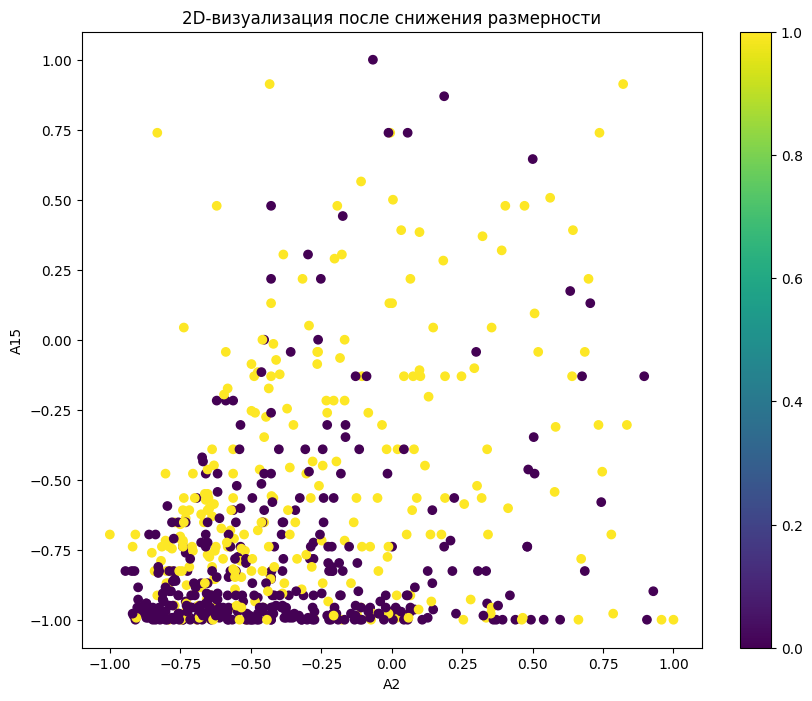

In [17]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=true_labels, cmap='viridis')
plt.title('2D-визуализация после снижения размерности')
plt.xlabel('A2')
plt.ylabel('A15')
plt.colorbar()
plt.show()


# 6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок. 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features_reduced, labels, test_size=0.25, random_state=17)

In [20]:
errors = []

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))
    

optimal_k = np.argmin(errors) + 1
print('Oптимальное значение параметра К =',optimal_k)

Oптимальное значение параметра К = 8


# 7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок. 

In [21]:
print(f"Oптимальное значение параметра К: {optimal_k}")

Oптимальное значение параметра К: 8


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))


Classification Report:
              precision    recall  f1-score   support

           +       0.59      0.61      0.60        69
           -       0.71      0.69      0.70        95

    accuracy                           0.66       164
   macro avg       0.65      0.65      0.65       164
weighted avg       0.66      0.66      0.66       164



In [23]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimal))


Confusion Matrix:
[[42 27]
 [29 66]]


# 8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов: 

• наивного байесовского классификатор 

• классификатора метода К ближайших соседей для значения К, определенного в п. 6. 

In [24]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя. 

In [26]:
from sklearn.model_selection import cross_val_score

# F1 для KNN
knn_f1 = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='f1_macro')
print(f"KNN F1: %.2f%% (%.2f%%)" % (knn_f1.mean()*100.0,
                                     knn_f1.std()*100.0))


# F1 для наивного байеса
nb_f1 = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='f1_macro')
print(f"Naive Bayes F1: %.2f%% (%.2f%%)" % (nb_f1.mean()*100.0,
                                     nb_f1.std()*100.0))

KNN F1: 65.12% (4.01%)
Naive Bayes F1: 59.12% (7.15%)


# 10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

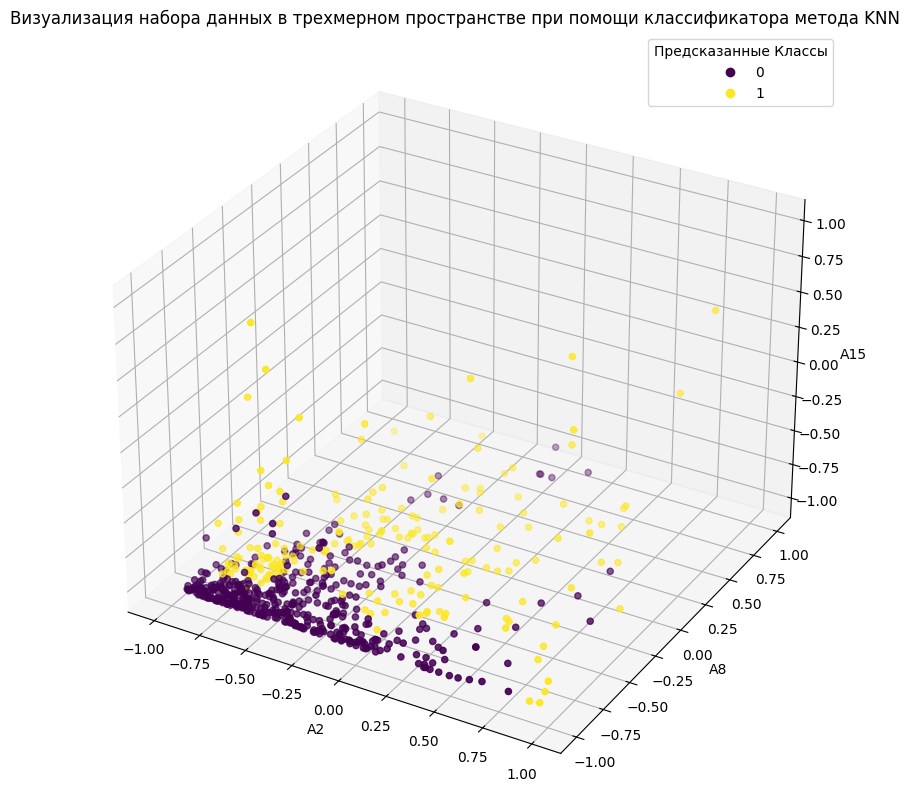

In [27]:
y_pred_3d_num = np.array(labels).astype(str).astype(object)
y_pred_3d_num[y_pred_3d_num == '-'] = 0
y_pred_3d_num[y_pred_3d_num == '+'] = 1
y_pred_3d_num = y_pred_3d_num.astype(float)

knn_model_3d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model_3d.fit(features_scaled, y_pred_3d_num)

y_pred_3d = knn_model_3d.predict(features_scaled)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2], c=y_pred_3d, cmap='viridis')


plt.title('Визуализация набора данных в трехмерном пространстве при помощи классификатора метода KNN')
ax.set_xlabel('A2')
ax.set_ylabel('A8')
ax.set_zlabel('A15')
plt.legend(*sc.legend_elements(), title="Предсказанные Классы")
plt.show()